<a href="https://colab.research.google.com/github/twishackaul/Sentimental-Analysis_Imdb/blob/main/Sentiment_Analysis_Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
from keras.datasets import imdb
import numpy as np
import tensorflow as tf

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [245]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [246]:
X_train.shape

(25000,)

In [247]:
y_train.shape

(25000,)

In [248]:
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [249]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [250]:
X_train = pad_sequences(X_train, padding = 'post', maxlen = 50)
X_test = pad_sequences(X_test, padding = 'post', maxlen = 50)

In [251]:
model = Sequential()
model.add(LSTM(32, input_shape = (50,1), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(metrics = ['accuracy'], loss = 'binary_crossentropy', optimizer = 'adam')

50 represents the number of time steps in each input sequence.

1 represents the number of features at each time step.

[1, 14, 22, 16, 43, ..., 0, 0, 0]

[[1], [14], [22], [16], [43], ..., [0], [0], [0]]

In [252]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 32)                4352      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
X_train.shape

(25000, 50)

In [254]:
# reshaping input data

X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [255]:
X_train.shape

(25000, 50, 1)

In [256]:
X_test.shape

(25000, 50, 1)

In [257]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
782/782 [==============================] - 51s 61ms/step - loss: 0.6959 - accuracy: 0.5045 - val_loss: 0.7016 - val_accuracy: 0.5045
Epoch 2/10
782/782 [==============================] - 44s 56ms/step - loss: 0.6926 - accuracy: 0.5177 - val_loss: 0.7018 - val_accuracy: 0.5051
Epoch 3/10
782/782 [==============================] - 47s 60ms/step - loss: 0.6926 - accuracy: 0.5175 - val_loss: 0.6909 - val_accuracy: 0.5320
Epoch 4/10
782/782 [==============================] - 45s 58ms/step - loss: 0.6911 - accuracy: 0.5238 - val_loss: 0.6897 - val_accuracy: 0.5352
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.6904 - accuracy: 0.5268 - val_loss: 0.6884 - val_accuracy: 0.5436
Epoch 6/10
782/782 [==============================] - 45s 58ms/step - loss: 0.6895 - accuracy: 0.5323 - val_loss: 0.6913 - val_accuracy: 0.5266
Epoch 7/10
782/782 [==============================] - 46s 59ms/step - loss: 0.6896 - accuracy: 0.5347 - val_loss: 0.6882 - val_accuracy:

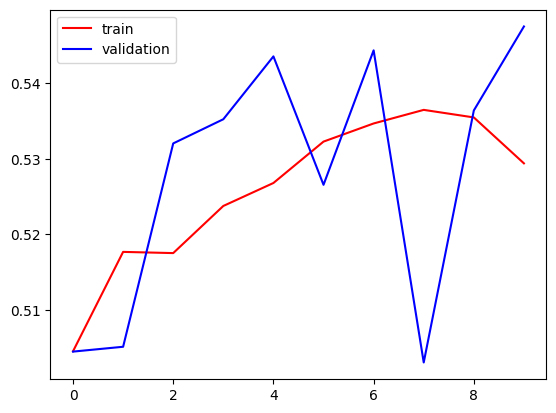

In [258]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

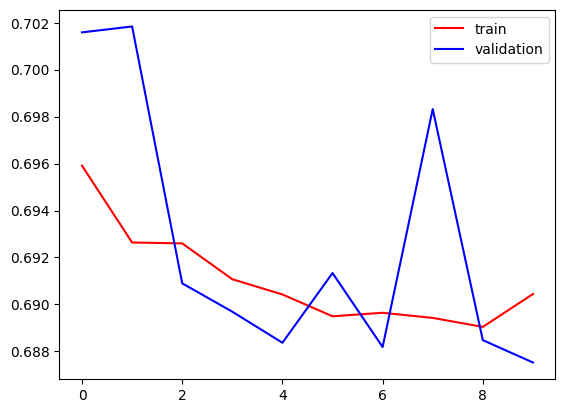

In [259]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [260]:
new_reviews = ["I purchased a larger one for bedroom and it arrived with a busted screen, so I ordered a replacement and got it on Friday. Took it out and set it up. NO picture - only static with a BLACK screen. It was hooked to Direct TV so we knew there was a problem when there was no picture and only static. It wouldn't respond to remote buttons or the buttons on the TV itself - definitely a problem. I called LG customer service and we performed a couple of their tests recommendations and finally got voice sound but still no picture, then we lost the voice again. The Customer Service lady told me this LG was defective. VERY disappointing to say the least - to receive not one but 2 broke/defective TV's. I'm ready to get my money back and try another brand. And I really do like my smaller LG so this is even more upsetting!",
               "Is a terrible company, not professional keep on change account manager and acct manager look at their own interest (commission) only, mislead clients and end up I lose my capital."]

In [261]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token = '<nothing>')

In [262]:
# Integer Encoding

tokenizer.fit_on_texts(new_reviews)

In [263]:
tokenizer.word_index

{'<nothing>': 1,
 'and': 2,
 'a': 3,
 'it': 4,
 'i': 5,
 'to': 6,
 'the': 7,
 'was': 8,
 'so': 9,
 'on': 10,
 'no': 11,
 'picture': 12,
 'only': 13,
 'we': 14,
 'lg': 15,
 'my': 16,
 'one': 17,
 'with': 18,
 'screen': 19,
 'got': 20,
 'up': 21,
 'static': 22,
 'tv': 23,
 'there': 24,
 'problem': 25,
 'buttons': 26,
 'customer': 27,
 'service': 28,
 'their': 29,
 'voice': 30,
 'but': 31,
 'this': 32,
 'defective': 33,
 'not': 34,
 'is': 35,
 'manager': 36,
 'purchased': 37,
 'larger': 38,
 'for': 39,
 'bedroom': 40,
 'arrived': 41,
 'busted': 42,
 'ordered': 43,
 'replacement': 44,
 'friday': 45,
 'took': 46,
 'out': 47,
 'set': 48,
 'black': 49,
 'hooked': 50,
 'direct': 51,
 'knew': 52,
 'when': 53,
 "wouldn't": 54,
 'respond': 55,
 'remote': 56,
 'or': 57,
 'itself': 58,
 'definitely': 59,
 'called': 60,
 'performed': 61,
 'couple': 62,
 'of': 63,
 'tests': 64,
 'recommendations': 65,
 'finally': 66,
 'sound': 67,
 'still': 68,
 'then': 69,
 'lost': 70,
 'again': 71,
 'lady': 72,
 't

In [264]:
tokenizer.word_counts

OrderedDict([('i', 5),
             ('purchased', 1),
             ('a', 8),
             ('larger', 1),
             ('one', 2),
             ('for', 1),
             ('bedroom', 1),
             ('and', 10),
             ('it', 6),
             ('arrived', 1),
             ('with', 2),
             ('busted', 1),
             ('screen', 2),
             ('so', 3),
             ('ordered', 1),
             ('replacement', 1),
             ('got', 2),
             ('on', 3),
             ('friday', 1),
             ('took', 1),
             ('out', 1),
             ('set', 1),
             ('up', 2),
             ('no', 3),
             ('picture', 3),
             ('only', 3),
             ('static', 2),
             ('black', 1),
             ('was', 4),
             ('hooked', 1),
             ('to', 5),
             ('direct', 1),
             ('tv', 2),
             ('we', 3),
             ('knew', 1),
             ('there', 2),
             ('problem', 2),
             ('when', 1

In [265]:
tokenizer.document_count

2

In [266]:
sequences = tokenizer.texts_to_sequences(new_reviews)

In [267]:
sequences

[[5,
  37,
  3,
  38,
  17,
  39,
  40,
  2,
  4,
  41,
  18,
  3,
  42,
  19,
  9,
  5,
  43,
  3,
  44,
  2,
  20,
  4,
  10,
  45,
  46,
  4,
  47,
  2,
  48,
  4,
  21,
  11,
  12,
  13,
  22,
  18,
  3,
  49,
  19,
  4,
  8,
  50,
  6,
  51,
  23,
  9,
  14,
  52,
  24,
  8,
  3,
  25,
  53,
  24,
  8,
  11,
  12,
  2,
  13,
  22,
  4,
  54,
  55,
  6,
  56,
  26,
  57,
  7,
  26,
  10,
  7,
  23,
  58,
  59,
  3,
  25,
  5,
  60,
  15,
  27,
  28,
  2,
  14,
  61,
  3,
  62,
  63,
  29,
  64,
  65,
  2,
  66,
  20,
  30,
  67,
  31,
  68,
  11,
  12,
  69,
  14,
  70,
  7,
  30,
  71,
  7,
  27,
  28,
  72,
  73,
  74,
  32,
  15,
  8,
  33,
  75,
  76,
  6,
  77,
  7,
  78,
  6,
  79,
  34,
  17,
  31,
  80,
  81,
  33,
  82,
  83,
  84,
  6,
  85,
  16,
  86,
  87,
  2,
  88,
  89,
  90,
  2,
  5,
  91,
  92,
  93,
  16,
  94,
  15,
  9,
  32,
  35,
  95,
  96,
  97],
 [35,
  3,
  98,
  99,
  34,
  100,
  101,
  10,
  102,
  103,
  36,
  2,
  104,
  36,
  105,
  106,
  29,
  10

In [268]:
from keras.utils import pad_sequences

In [269]:
sequences = pad_sequences(sequences, padding = 'post', maxlen = 50)
sequences

array([[  7,  27,  28,  72,  73,  74,  32,  15,   8,  33,  75,  76,   6,
         77,   7,  78,   6,  79,  34,  17,  31,  80,  81,  33,  82,  83,
         84,   6,  85,  16,  86,  87,   2,  88,  89,  90,   2,   5,  91,
         92,  93,  16,  94,  15,   9,  32,  35,  95,  96,  97],
       [ 35,   3,  98,  99,  34, 100, 101,  10, 102, 103,  36,   2, 104,
         36, 105, 106,  29, 107, 108, 109,  13, 110, 111,   2, 112,  21,
          5, 113,  16, 114,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int32)

In [270]:
sequences.shape

(2, 50)

In [271]:
sequences = np.expand_dims(sequences, axis = -1)
sequences.shape

(2, 50, 1)

In [272]:
predictions = model.predict(sequences)
predictions

1/1 [==============================] - 0s 255ms/step


array([[0.45491585],
       [0.6170852 ]], dtype=float32)

In [274]:
# Interpret the predictions

for review, prediction in zip(new_reviews, predictions):
    sentiment = "positive" if prediction > 0.75 else "negative"
    print(f"Review: {review[:10]}... - Sentiment: {sentiment}")

Review: I purchase... - Sentiment: negative
Review: Is a terri... - Sentiment: negative
